In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from jigsaw.settings import TRAIN_CSV

df = pd.read_csv(TRAIN_CSV)
df.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1


In [48]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,banks don't want you to know this! click here ...,"no advertising: spam, referral links, unsolici...",futurology,if you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,watch golden globe awards 2017 live online in ...,"double cee x bands epps - ""birds""\n\ndownload/...",0
1,1,sd stream [ eng link 1] (http://www.sportsstre...,"no advertising: spam, referral links, unsolici...",soccerstreams,[i wanna kiss you all over! stunning!](http://...,lolga.com is one of the first professional onl...,#rapper \n🚨straight outta cross keys sc 🚨youtu...,[15 amazing hidden features of google search y...,0
2,2,lol. try appealing the ban and say you won't d...,no legal advice: do not offer or request legal...,pcmasterrace,don't break up with him or call the cops. if ...,it'll be dismissed: https://en.wikipedia.org/w...,where is there a site that still works where y...,because this statement of his is true. it isn'...,1
3,3,she will come your home open her legs with an...,"no advertising: spam, referral links, unsolici...",sex,selling tyrande codes for 3€ to paypal. pm. \n...,tight pussy watch for your cock get her at thi...,nsfw(obviously) http://spankbang.com/iy3u/vide...,good news ::download whatsapp 2.16.230 apk for...,1
4,4,code free tyrande --->>> [imgur](http://i.imgu...,"no advertising: spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,we're streaming pokemon veitnamese crystal rig...,1


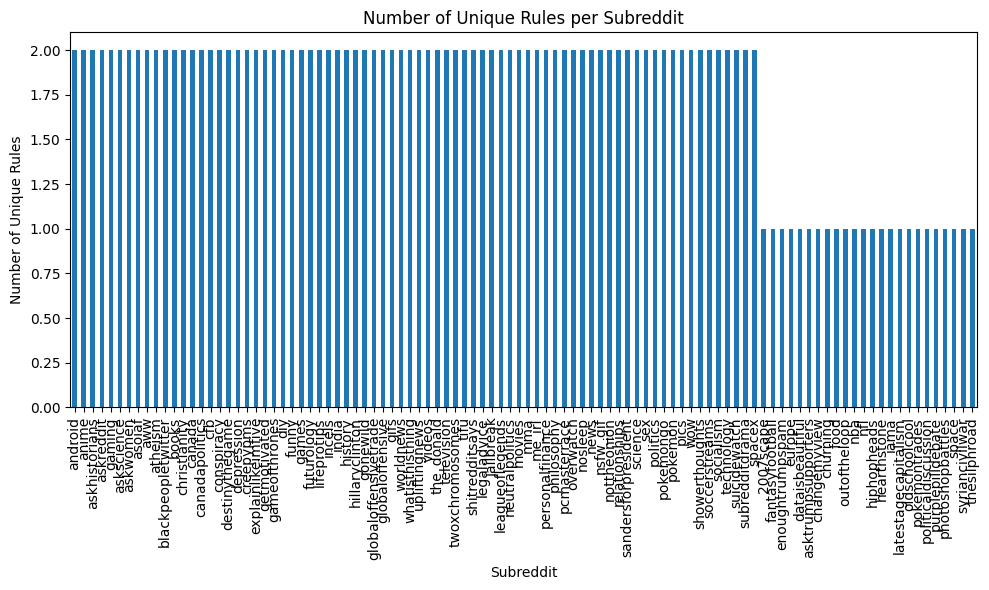

/tmp/ipykernel_18029/3757963798.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


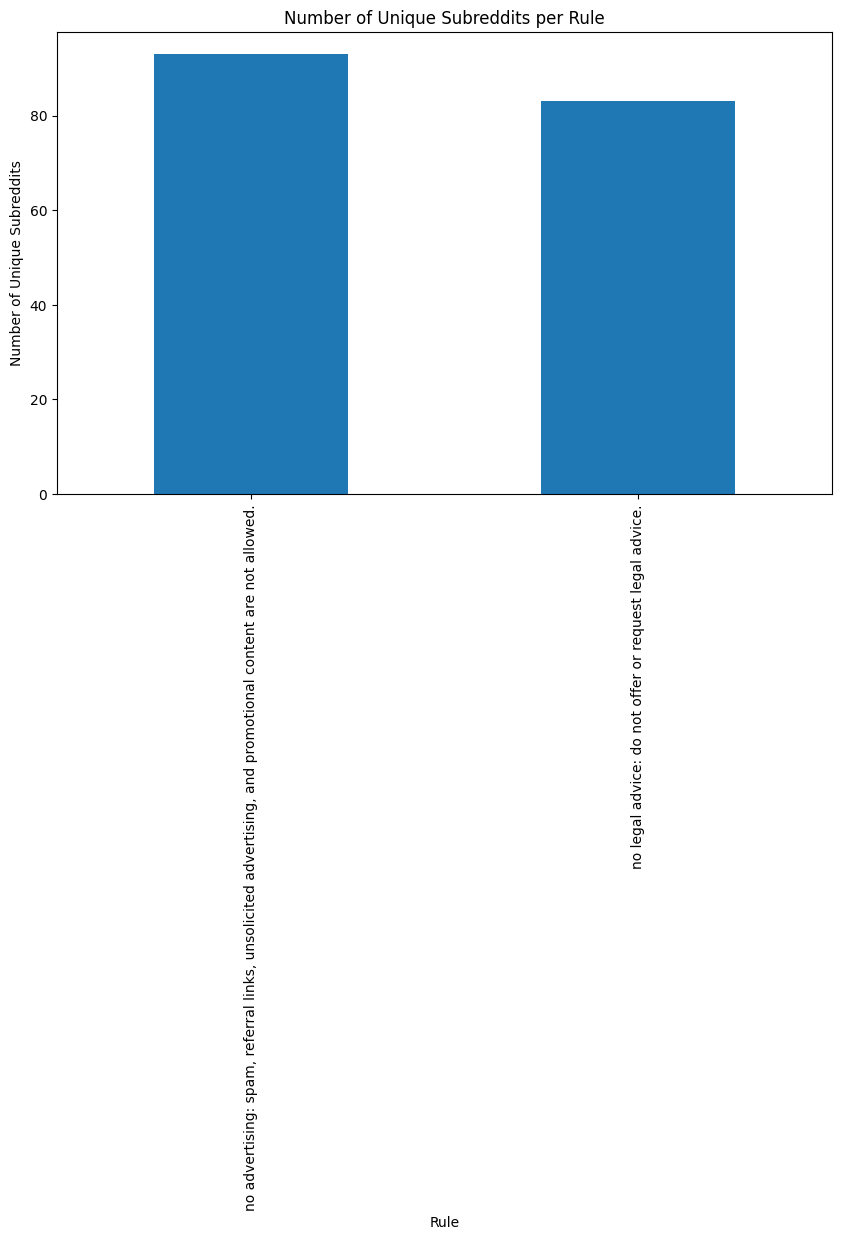

In [49]:
# Group by subreddit and count unique rules per subreddit
subreddit_rule_counts = (
    df.groupby("subreddit")["rule"].nunique().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
subreddit_rule_counts.plot(kind="bar")
plt.title("Number of Unique Rules per Subreddit")
plt.ylabel("Number of Unique Rules")
plt.xlabel("Subreddit")
plt.tight_layout()
plt.show()

# Group by rule and count unique subreddits per rule
rule_subreddit_counts = (
    df.groupby("rule")["subreddit"].nunique().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
rule_subreddit_counts.plot(kind="bar")
plt.title("Number of Unique Subreddits per Rule")
plt.ylabel("Number of Unique Subreddits")
plt.xlabel("Rule")
plt.tight_layout()
plt.show()

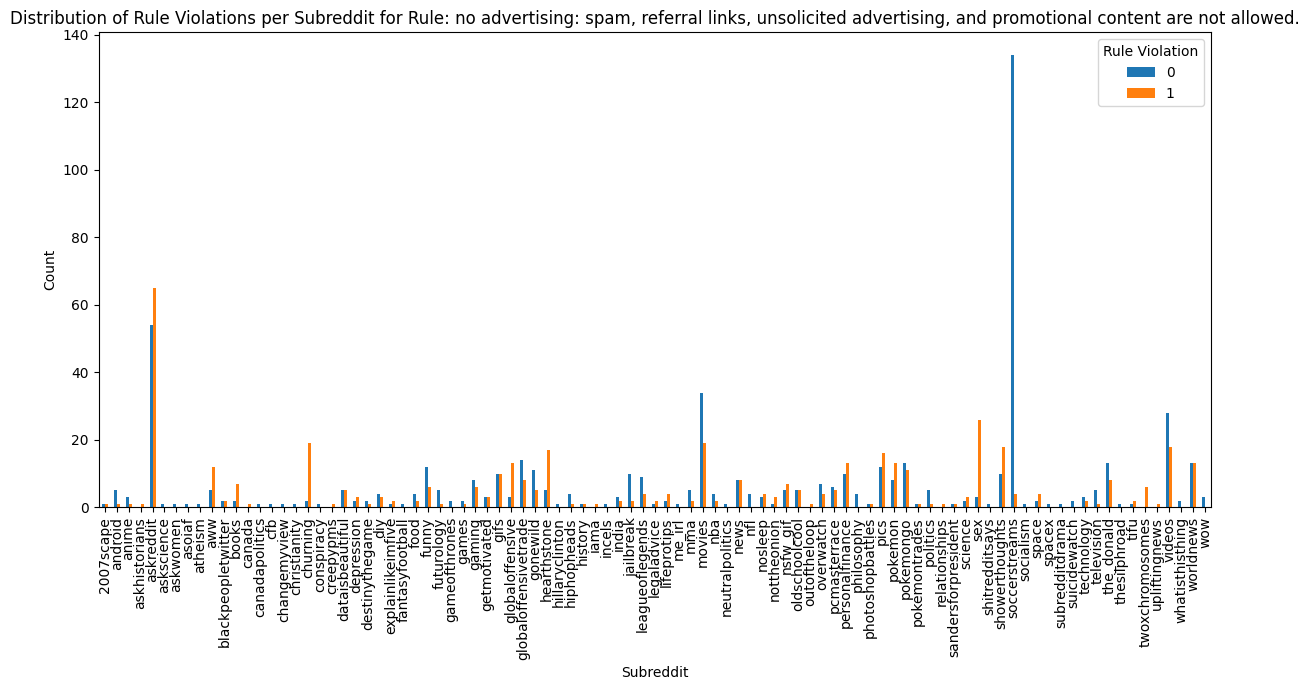

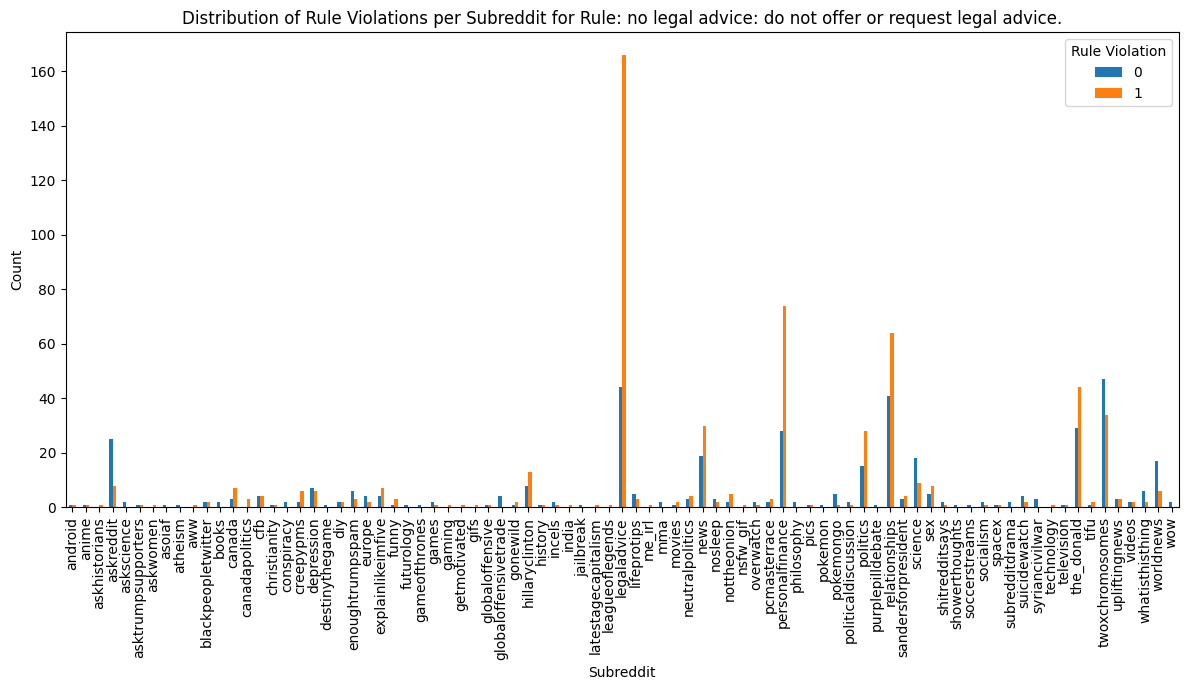

In [50]:
# There are only 2 rules. Show rule_violation distribution per subreddit, split by rule.
# We'll use a multi-index groupby and plot with hue on rule.

grouped = (
    df.groupby(["subreddit", "rule", "rule_violation"]).size().unstack(fill_value=0)
)

for rule in df["rule"].unique():
    rule_group = grouped.xs(rule, level="rule")
    rule_group.plot(kind="bar", stacked=False, figsize=(12, 7))
    plt.title(f"Distribution of Rule Violations per Subreddit for Rule: {rule}")
    plt.xlabel("Subreddit")
    plt.ylabel("Count")
    plt.legend(title="Rule Violation")
    plt.tight_layout()
    plt.show()

In [51]:
grouped = (
    df.groupby(["subreddit", "rule", "rule_violation"]).size().unstack(fill_value=0)
)
print(grouped)

rule_violation                                                       0   1
subreddit       rule                                                      
2007scape       no advertising: spam, referral links, unsolicit...   1   1
android         no advertising: spam, referral links, unsolicit...   5   1
                no legal advice: do not offer or request legal ...   1   1
anime           no advertising: spam, referral links, unsolicit...   3   1
                no legal advice: do not offer or request legal ...   1   1
...                                                                 ..  ..
whatisthisthing no legal advice: do not offer or request legal ...   6   2
worldnews       no advertising: spam, referral links, unsolicit...  13  13
                no legal advice: do not offer or request legal ...  17   6
wow             no advertising: spam, referral links, unsolicit...   3   0
                no legal advice: do not offer or request legal ...   2   0

[176 rows x 2 columns]


In [52]:
from litellm import completion
from dotenv import load_dotenv

load_dotenv()

r = completion(
    model="openrouter/openai/gpt-4o-mini",
    response_format={"type": "json_object"},
    messages=[{"role": "user", "content": "Hello, world! Answer with Json please"}],
)

In [31]:
r

ModelResponse(id='gen-1760627314-0gN56a33YJr8WT4y3tSw', created=1760627314, model='openai/gpt-4o-mini', object='chat.completion', system_fingerprint='fp_560af6e559', choices=[Choices(finish_reason='stop', index=0, message=Message(content='{\n  "message": "Hello, world!"\n}', role='assistant', tool_calls=None, function_call=None, provider_specific_fields={'refusal': None, 'reasoning': None}), provider_specific_fields={'native_finish_reason': 'stop'})], usage=Usage(completion_tokens=11, prompt_tokens=15, total_tokens=26, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None, text_tokens=None, image_tokens=0), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None), cost=8.85e-06, is_byok=False, cost_details={'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 2.25e-06, 'upstream_inference_completions_cost'

In [53]:
df.nunique()

row_id                2029
body                  1869
rule                     2
subreddit              100
positive_example_1     458
positive_example_2     461
negative_example_1     489
negative_example_2     493
rule_violation           2
dtype: int64

In [54]:
duplicate_rows_df = df[df.duplicated(subset=["positive_example_1"], keep=False)]
len(duplicate_rows_df)

1997

In [45]:
len(duplicate_rows_df)

1997

In [7]:
test_df = pd.DataFrame({"A": [1, 2, 3, 4], "B": [5, 6, 7, 8]})
test_df.head()

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [8]:
test_df2 = pd.DataFrame({"A": [1, 2, 3, 4], "B": [5, 6, 7, 8]})
test_df2.head()

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [10]:
a = pd.concat([test_df, test_df2])
a.head(10)

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
0,1,5
1,2,6
2,3,7
3,4,8


In [11]:
b = a.copy()
b.head()

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
0,1,5


In [23]:
from itertools import batched
a = [1, 2, 3, 4, 5]

for batch in batched(a, 2):
    for i, j in enumerate(batch):
        print(i, j)


0 1
1 2
0 3
1 4
0 5


In [15]:
final = a.join(b, on="B", rsuffix="_2", how="inner")
final.head()

,A,B,M,B_2
